## Загрузка данных

### Библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Файл с фразами основной

In [2]:
df = pd.read_excel('frazy_kosmetika.xlsx')

### Файл с фразами с листа Регионы

In [3]:
df_regions = pd.read_excel('frazy_kosmetika.xlsx', sheet_name='Регионы')

### Загрузка списка предлогов

In [4]:
spisok_predlogov = pd.read_excel('spisok_predlogov.xlsx', names=['predlogi'])

### Размер датафрейма

In [5]:
df.shape

(78681, 8)

In [6]:
df_regions.shape

(1948, 8)

## Анализ фраз по длине

### Фразы какой длины представлены в статистике

Распределение в %:

In [37]:
df['Длина_фразы_без_предлогов'].value_counts(normalize=True)

4    0.358397
3    0.278542
5    0.227997
6    0.070068
2    0.056291
7    0.008312
1    0.000394
Name: Длина_фразы_без_предлогов, dtype: float64

Гистограмма:

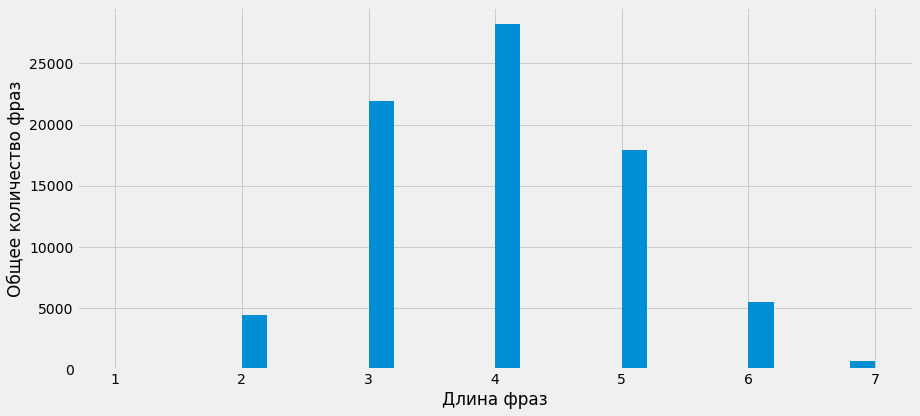

In [38]:
with plt.style.context('fivethirtyeight'):
    df['Длина_фразы_без_предлогов'].hist(figsize=(13, 6), bins=30)
    plt.ylabel('Общее количество фраз')
    plt.xlabel('Длина фраз')
    plt.tight_layout()
    plt.savefig('length_words_count.png')

Фразы из 4 слов составляют 35%, из 3 слов – 27%, из 5 -22% и т.д. Больше всего фраз из 4 слов, меньше всего из 1 и 7 – менее 1%.

Попробуем понять какой объем частот содержат разные группы фраз. Для этого просто сложим частоту «» и частоту «!» и отобразим на графике:

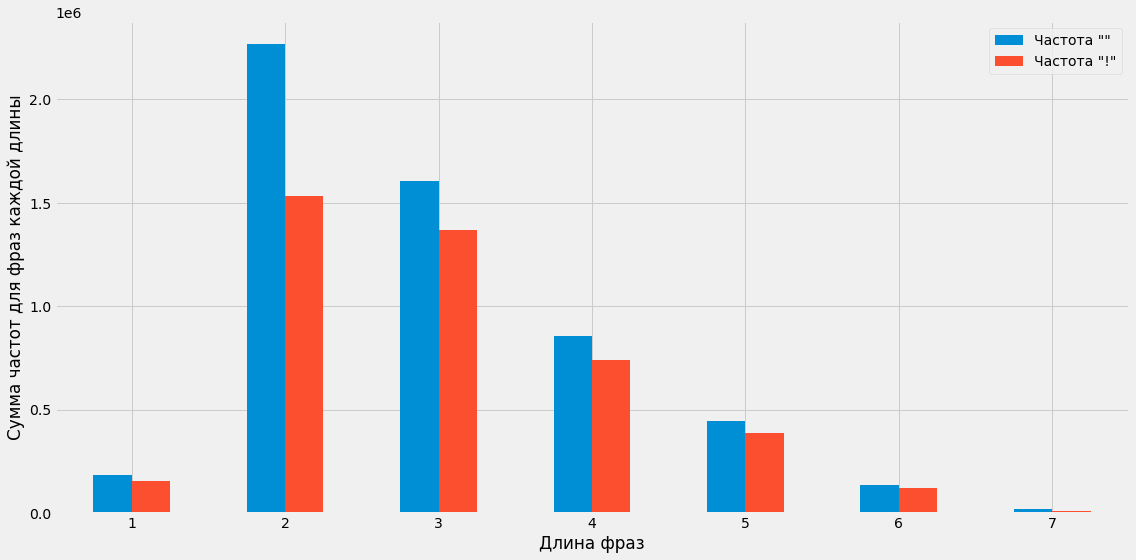

In [39]:
with plt.style.context('fivethirtyeight'):
        (
        df.groupby('Длина_фразы_без_предлогов')[['Частота ""', 'Частота "!"']]
        .sum()
        .plot(kind = 'bar', figsize =(16,8))
        )
        plt.ylabel('Сумма частот для фраз каждой длины')
        plt.xlabel('Длина фраз')
        plt.xticks(rotation=360)
        plt.tight_layout()
        plt.savefig('lenght_words_freq_sum.png')

Не смотря на то, что большая часть фраз состоит из 4 слов, самые «увесистые» по частоте состоят из 2 слов, на долю которых приходится всего 5% - наверное там какие-то самые популярные фразы. На втором месте по сумме всех частот фразы из 3 слов, они же на втором месте по доле от всего количества фраз – 27%. Возможно это самые интересные для продвижения в плане ценности фразы. В целом диаграмма выглядит адекватно: чем длиннее поисковые запросы, тем они уникальнее и обладают более низкой частотой.


<b>Вывод:</b><br>
Я бы сделал промежуточный вывод, что в статистике по фразам о косметике преобладают фразы от 3 до 5 слов, большая часть которых приходится на довольно длинные фразы (4 и 5). Стоит рассмотреть каждую группу отдельно и попытаться сделать выводы.

## Распределение частотности

### Общая информация:

In [40]:
df[['Частота ""', 'Частота "!"']].describe()

,"Частота """"","Частота ""!"""
count,78671.000000,78671.000000
mean,70.117477,54.924064
std,1254.628996,856.323583
min,0.000000,0.000000
25%,2.000000,1.000000
50%,6.000000,5.000000
75%,20.000000,17.000000
max,157181.000000,120031.000000


Mean – среднее арифметическое, 50% - медиана, min и max – минимальное и максимальное значение, std – стандартное отклонение.
<br><br>
Среднее является алгебраической характеристикой, т.к для расчетов используются все данные, из-за этого оно подвержено влиянию выбросов – экстремально больших или малых значений, которые выбиваются из общей выборки и «утягивают» среднее значение за собой.
<br><br>
Медиана – структурная характеристика, число которое находится по середине упорядоченного списка значений, т.е. 50% значений больше медианы, а другая половина меньше.
<br><br>
Разница между средним и медианой и структурной метрикой 75% показывает, что датасет «скошен» в сторону больших значений, которые сильно выбиваются из общей выборки и «утягивают» за собой среднее. Основная часть данных сконцентрирована около медианного значения (это хорошо будет видно на графиках).
<br><br>
Стандартное отклонение – контринтуитивная метрика, которое говорит о сильном разбросе данных, в нашем случае от 0 до 157181. Чем дальше от 1 значение стандартного отклонения, тем сильнее разброс.


## Гистограмма

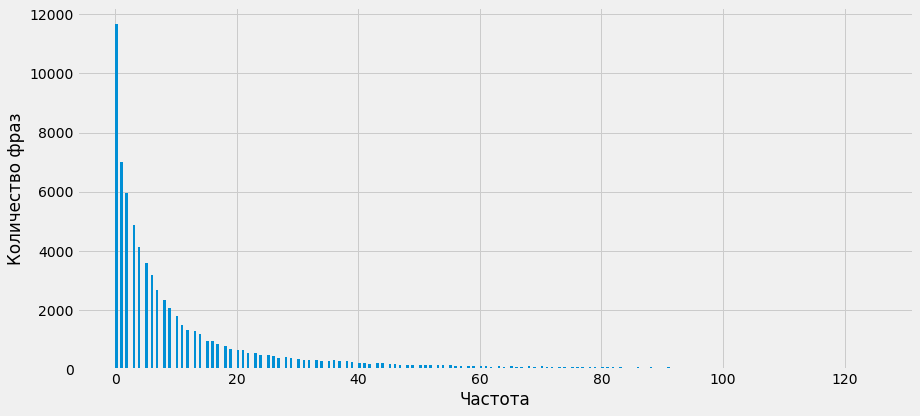

In [41]:
with plt.style.context('fivethirtyeight'):
    df['Частота ""'].hist(figsize=(13, 6), bins=300, range=(0,125))
    plt.ylabel('Количество фраз')
    plt.xlabel('Частота')
    plt.tight_layout()
    plt.savefig('hist.png')

Основное количество фраз сконцентрировано в районе от 0 до 20, на предыдущем этапе мы выяснили, что это 75% всех фраз, оставшиеся 25% имеют частоту больше 20, больше 40 имеют какие-то редкие фразы, а более 80 единицы. Медиана равна 6 и находится в самом крупном скоплении фраз, а среднее равно 70 и находится так далеко от реальной частоты, потому что было «утянуто» супер частотными фразами. Гистограмма наглядно отражает выводы, сделанные в предыдущем пункте.

### Диаграмма размаха

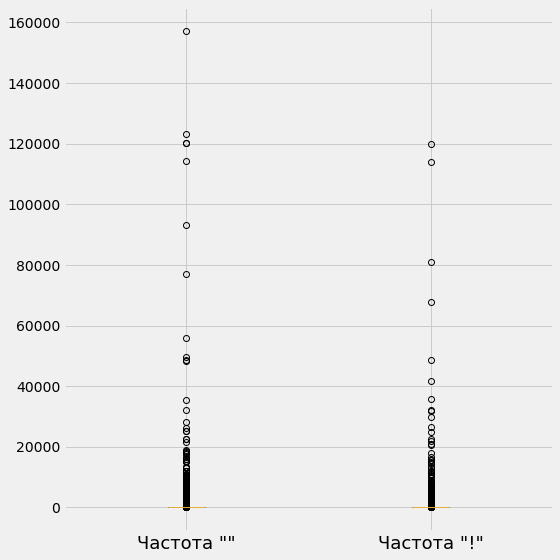

In [42]:
with plt.style.context('fivethirtyeight'): 
    (
    df[['Частота ""', 'Частота "!"']].boxplot(figsize = (8, 8))
    )
    plt.xticks(fontsize=18)
    plt.tight_layout()
    plt.savefig('boxplot_global.png')

Ничего непонятно. График выглядит неинформативно, потому что большая часть данных имеет частоту до 20, они «схлопнулись» в районе 0 на графике. Отдельными кругами и скоплениями кругов являются выбросы – экстремальные значения, которые выбиваются из общей выборки. Мы помним, что самое максимальное значение в колонке с частотой «» - 157181, последний круг около 160000 и есть это максимальное значение. После частоты 20 000 круги можно посчитать, глядя на график, то есть это совсем небольшое количество фраз. До 20000 большое скопление выбросов.

Переделаем график с ограничением по частоте:

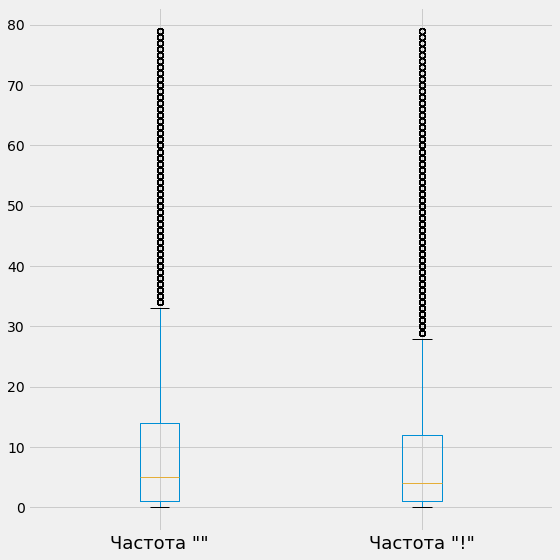

In [43]:
with plt.style.context('fivethirtyeight'):
    df[(df['Частота ""'] < 80) & (df['Частота "!"'] < 80)][['Частота ""', 'Частота "!"']].boxplot(figsize = (8, 8))
    plt.xticks(fontsize=18)
    plt.tight_layout()
    plt.savefig('boxplot_less_80.png')

Диаграмма размаха показывать межквартильный размах – от первого «уса» в районе 0 до последнего около 32 для частоты «» и примерно 28 для частоты «!». Желтая линия – медиана. Все, что находится за пределами «усов» является выбросом.

## Срезы

Сделаем 3 среза: фразы с экстремально частотными выбросами - от 20 000, выбросы с менее экстремальными частоты – от 20 000 до 1000, выбросы от 1000 до 32, и срез нормальными частотами. Все срезы экспортируем в таблицу на разные листы.

### Срез от 20 000 и больше

In [44]:
most_extreme_frequency = df[df['Частота ""'] > 20000]

In [45]:
most_extreme_frequency.shape[0]

20

### от 20 000 до 1000

In [46]:
twenty_k_1k_frequency = df[(df['Частота ""'] < 20000) & (df['Частота ""'] > 1000)]

In [47]:
twenty_k_1k_frequency.shape[0]

715

### от 1000 до 32

In [48]:
onek_32_frequency = df[(df['Частота ""'] < 1000) & (df['Частота ""'] > 32)]

In [49]:
onek_32_frequency.shape[0]

13032

### Основные данные

In [50]:
most_common_frequency = df[df['Частота ""'] <= 31]

In [51]:
most_common_frequency.shape[0]

64579

### Экспорт срезов

In [52]:
writer_kernel = pd.ExcelWriter('srezy_fraz_po_chastote.xlsx', engine='xlsxwriter')

most_extreme_frequency.to_excel(writer_kernel, sheet_name='20 000 и больше', index=False)
twenty_k_1k_frequency.to_excel(writer_kernel, sheet_name='от 20 000 до 1000', index=False)
onek_32_frequency.to_excel(writer_kernel, sheet_name='от 1000 до 32', index=False)
most_common_frequency.to_excel(writer_kernel, sheet_name='Основные данные', index=False)

writer_kernel.save()

## Анализ слов

### Фразу, состоящую из лемм, разобьем на отдельные слова в формате списка

In [14]:
df['Леммы_по_словам'] = df['Леммы'].apply(lambda x: x.split(' '))

### Загруженную таблицу с фразами, частотностью и другими признаками переведем в формат словаря

In [15]:
df_dict = df.to_dict('record')

/Users/andreytryastsin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


### Каждое слово в словарной форме (лемму) добавим в общий список всех слов list_of_words

In [16]:
list_of_words = []
for row in df_dict:
    list_of_lemmas = row['Леммы_по_словам']
    for word in list_of_lemmas:
        list_of_words.append(word)

In [17]:
len(list_of_words)

374221

### Из списка всех слов удалим предлоги

In [18]:
for pretext in spisok_predlogov['predlogi']:
    for word in list_of_words:
        if pretext == word:
            list_of_words.remove(word)

In [19]:
len(list_of_words)

313900

### Из списка сделаем датафрейм

In [20]:
df_words = pd.DataFrame(list_of_words, columns=['Слова'])

In [21]:
df_words

,Слова
0,израильский
1,косметика
2,израильский
3,косметика
4,лицо
...,...
313895,отзыв
313896,клиар
313897,витабө
313898,шампунь


### Визуализация

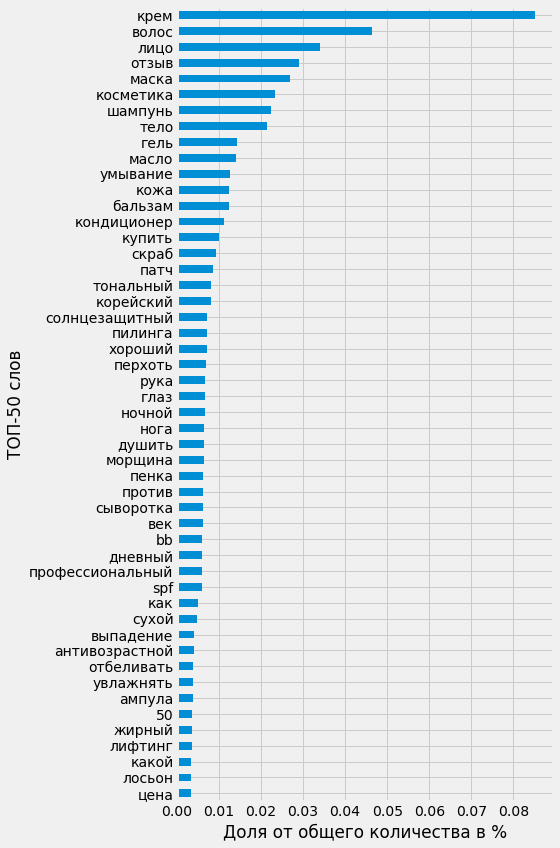

In [22]:
with plt.style.context('fivethirtyeight'):
    (
        df_words['Слова']
        .value_counts(normalize=True)
        .head(50)
        .sort_values(ascending=True)
        .plot(kind='barh', figsize =(8,12))
        
    )
    plt.ylabel('ТОП-50 слов')
    plt.xlabel('Доля от общего количества в %')
    plt.tight_layout()
    plt.savefig('words_percentage.png')

### Запишем данные в таблицу

Посчитаем количество каждого слова:

In [23]:
df_words.value_counts()

Слова    
крем         26739
волос        14569
лицо         10707
отзыв         9140
маска         8431
             ...  
sana             1
san              1
samsung          1
палочка          1
osmanthus        1
Length: 9916, dtype: int64

In [24]:
quantity = df_words.value_counts().reset_index()

In [25]:
quantity.head()

,Слова,0
0,крем,26739
1,волос,14569
2,лицо,10707
3,отзыв,9140
4,маска,8431


Посчитаем долю каждого слова от общего количества:

In [26]:
percentage = df_words.value_counts(normalize=True).reset_index()

In [27]:
percentage.head()

,Слова,0
0,крем,0.085183
1,волос,0.046413
2,лицо,0.034110
3,отзыв,0.029118
4,маска,0.026859


### Слияние таблицы с количеством и долями

In [28]:
ready_df = quantity.merge(percentage, on='Слова')

In [29]:
ready_df.head()

,Слова,0_x,0_y
0,крем,26739,0.085183
1,волос,14569,0.046413
2,лицо,10707,0.034110
3,отзыв,9140,0.029118
4,маска,8431,0.026859


## Экспорт таблицы

Переименование столбцов:

In [30]:
ready_df.rename(columns={'0_x':'Количество', '0_y':'Доля'}, inplace=True)

Экспорт:

In [31]:
writer_kernel = pd.ExcelWriter('analiz_slov.xlsx', engine='xlsxwriter')
ready_df.to_excel(writer_kernel)
writer_kernel.save()

## Уровень спроса в других городах

Сколько городов присутствует в статистике:

In [32]:
df_regions['Город'].nunique()

158

Сводная по городу и сумме частот "":

In [33]:
sum_by_city = (
    df_regions
    .groupby('Город')['Частота ""'].sum().reset_index()
    .sort_values(by='Частота ""', ascending=False)
)

In [34]:
sum_by_city.head(15)

,Город,"Частота """""
78,москва,70220
41,екатеринбург,17948
116,ростов,16085
33,гай,14681
150,челябинск,13990
145,уфа,8617
30,воронеж,7599
142,тюмень,6998
105,пермь,6174
89,новосибирск,6049


Визуализация ТОП30 городов:

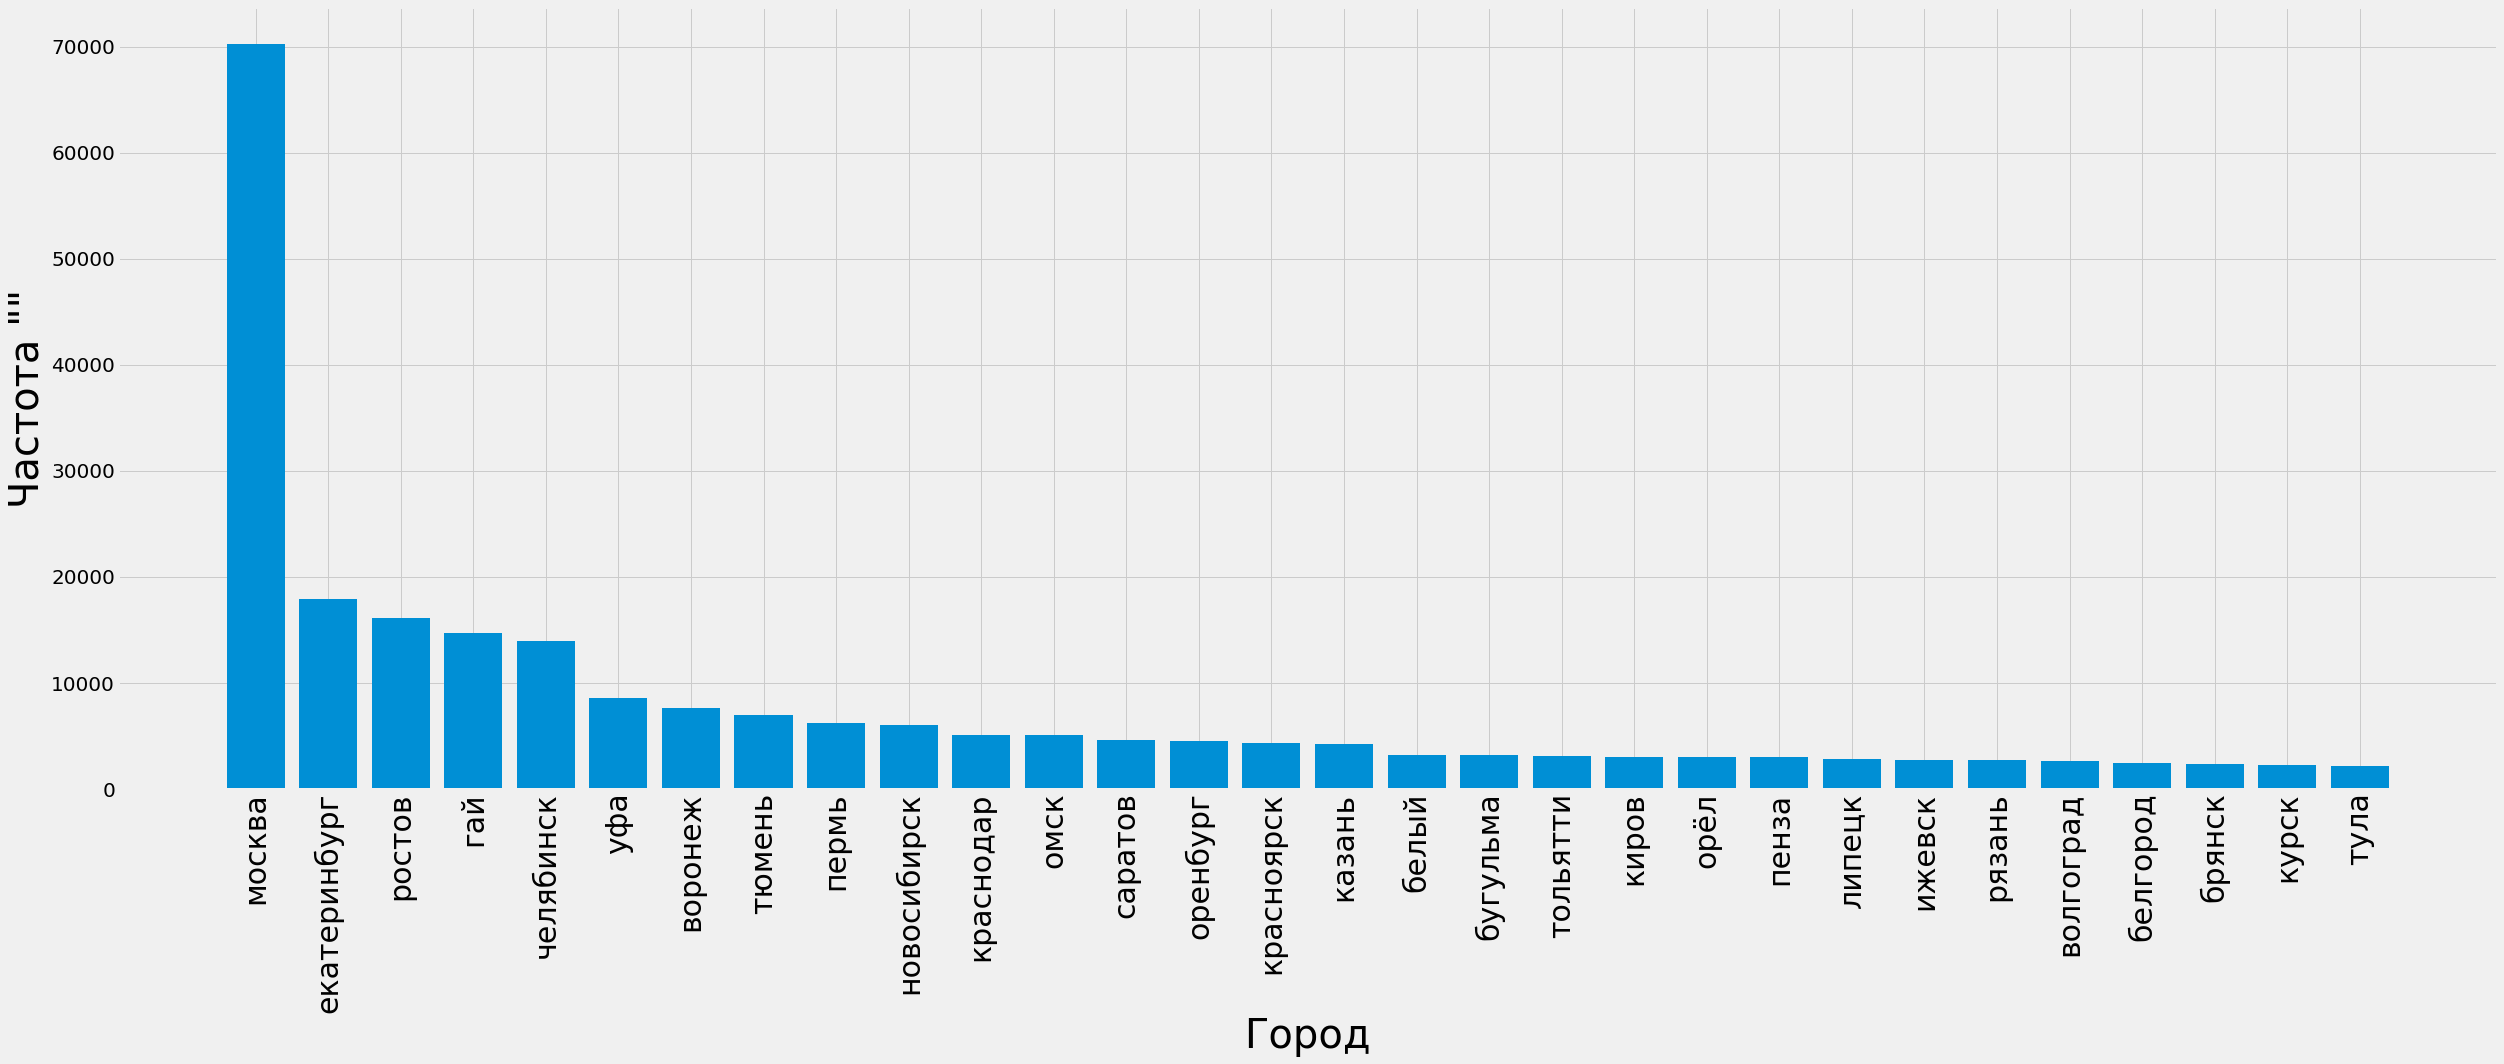

In [35]:
with plt.style.context('fivethirtyeight'):
    
    names_x = sum_by_city['Город'].head(30)
    values_y = sum_by_city['Частота ""'].head(30)
    
    plt.figure(figsize=(35,15))
    plt.bar(names_x, values_y)
    
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=20)
    
    plt.ylabel('Частота ""', fontsize=40)
    plt.xlabel('Город', fontsize=40)
    plt.tight_layout()
    plt.savefig('frequency_by_city.png')

Обратите внимание на 4 место город Гай, впервые встречаю такое название. Скорее всего это ошибка. Сделаю срез по названию города:

In [36]:
df_regions[df_regions['Город'] == 'гай']

,Фраза,"Частота """"","Частота ""!""",Леммы,Длина_фразы_без_предлогов,Город,Информационный_характер,Коммерческий_характер
1767,маска гая,125,91,маска гай,2,гай,-,-
1768,маски гаи фокс,7278,0,маска гай фокс,3,гай,-,-
1769,маска гая фокса,7278,5871,маска гай фокса,3,гай,-,-


Ошибка понятна – город Гай действительно существует, и на этапе определения города было обнаружено совпадение со словарными формами слов из нерелевантных фраз, которые обладают большой частотой. Так Гай оказался на 4 месте среди других российских мегаполисов.